In [1]:
import pandas as pd
import numpy as np
!pip install autoviz
!pip install wordcloud
from autoviz.AutoViz_Class import AutoViz_Class
# this will enable the visualization of the data 
import matplotlib.pyplot as plt
%matplotlib inline
#not sure I want the below items here.....
from sklearn import preprocessing
# these will allow for the KNN process later
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


In [116]:
# dataset is 10 fields (157,651 rows) regarding the marketing scheme for a bank based off of customer's:
# X/independent/predictive variables:
#   PackageSizeName - string - 1 value (P_15)
#   MaterialId - string - 4 values (M_129, M_127, M_47, M_46)
#   Brand - string - 1 value (B_3)
#   ProdCategory - string - 1 value (C_2)
#   SoldToCorporateEntity  - string - 75 values here
#   SoldToBanner - string - 86 values here
#   SoldToRegional - string - 117 values here
#   SoldToPartner - string - 268 values here
#   DateDate - date 
 

# Y/dependent/target variable:
# UnitsSold - decimal

df = pd.read_csv(r'C:\Users\tamle\Desktop\Utica\5 - MSDS Summer 2022\DSC-680 Capstone\datasets for python\BaseDataNullsRemoved.csv', index_col='DateDate', parse_dates=['DateDate'])



In [117]:
#df = df[[ 'DateWeek', 'MaterialId', 'DateDate', 'UnitsSold' ]]
df = df[[ 'UnitsSold' ]]
#set the index to the DateDate field
#df['DateDate'] = pd.to_datetime(df['DateDate'])
#df.set_index('DateDate') 


In [53]:
#change the MaterialId categorical values to integers
# df['MaterialId'].replace(to_replace = ['M_46', 'M_47', 'M_127', 'M_129'], value= [1,2,3,4], inplace=True)

#things updated! yeah 

In [118]:
df.dtypes
#df.MaterialId.unique()

UnitsSold    float64
dtype: object

In [94]:
print(df)
df.head()

         DateDate  UnitsSold
0      2019-07-13        0.0
1      2019-08-03        0.0
2      2019-08-31        1.0
3      2019-10-05        0.0
4      2020-01-04        0.0
...           ...        ...
100656 2022-05-28     5445.0
100657 2022-06-04     5967.0
100658 2022-06-11     6023.0
100659 2022-06-18     3738.0
100660 2022-06-25     5175.0

[100661 rows x 2 columns]


,DateDate,UnitsSold
0,2019-07-13,0.0
1,2019-08-03,0.0
2,2019-08-31,1.0
3,2019-10-05,0.0
4,2020-01-04,0.0


Shape of your Data Set loaded: (100661, 1)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    1 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set


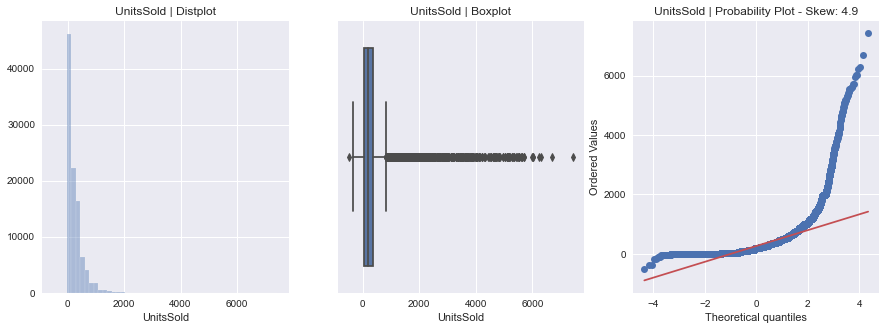

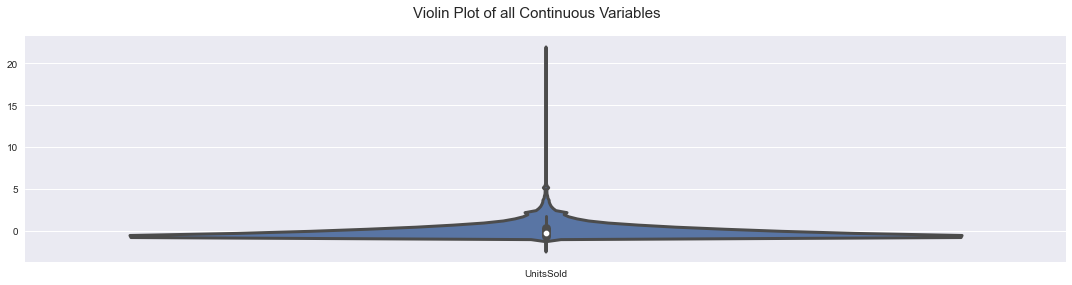

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 1.089

 ###################### VISUALIZATION Completed ########################


In [119]:
df1 = AutoViz_Class()
filename = ""
sep = ","

graph = df1.AutoViz(
    filename, 
    sep = ",",
    depVar = "",
    dfte = df, 
    header = 0,
    verbose = 0,
    lowess = False,
    chart_format = "svg",
    max_rows_analyzed = 157651,
    max_cols_analyzed = 10,
    )

In [120]:
#let's import some plotting abilities
import matplotlib.pyplot as plt
import matplotlib as mlp

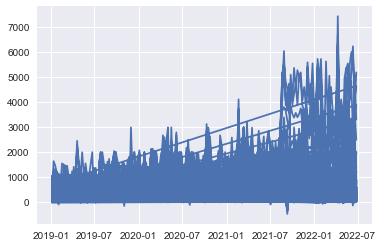

In [122]:
plt.plot(df)
plt.show()


In [132]:
# the last 170 weeks for data distribution fitting
data_for_dist_fitting = df[-170:]

In [133]:
# the last 170 weeks for training data
data_train = df[~df.isin(data_for_dist_fitting).all(1)] 

In [134]:
# test data for the last 50 weeks
test_data = data_for_dist_fitting[-50:] 

In [135]:
#subtract the test (50 months) data from the fitting (170 months) worth of data - this becomes 150 weeks

data_for_dist_fitting = data_for_dist_fitting[~data_for_dist_fitting.isin(test_data).all(1)] 

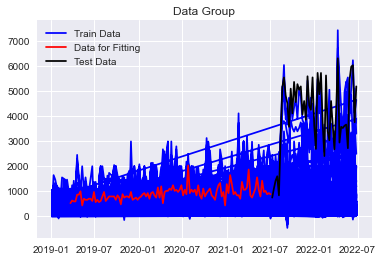

In [136]:
#let's plot these 3 data sets

train = plt.plot(data_train, color = 'blue', label = 'Train Data')

data_fitting = plt.plot(data_for_dist_fitting, color = 'red', label = 'Data for Fitting')

test = plt.plot(test_data, color = 'black', label = 'Test Data')

plt.legend(loc = 'best')
plt.title('Data Group')
plt.show(block=False) 


In [137]:
#check for stationarity


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries,color='blue', label = 'Original')
    mean = plt.plot(rolmean, color ='red', label ='Rolling Mean')
    std = plt.plot(rolstd, color ='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False) 
    
    #Perform Dickey Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

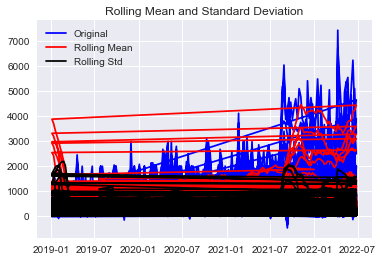

Results of Dickey Fuller Test:
Test Statistic                -1.084723e+01
p-value                        1.561254e-19
#Lags Used                     6.800000e+01
Number of Observations Used    9.999600e+04
Critical Value (1%)           -3.430415e+00
Critical Value (5%)           -2.861569e+00
Critical Value (10%)          -2.566785e+00
dtype: float64


In [138]:
test_stationarity(data_train)

# the rolling mean in our chart is mostly constant, except for the noise in 2021-current
#P-value from Dicky Fuller test is quite low (p-value 1.561254e-19) ... this is definitely less than .05, which means our set is stationary


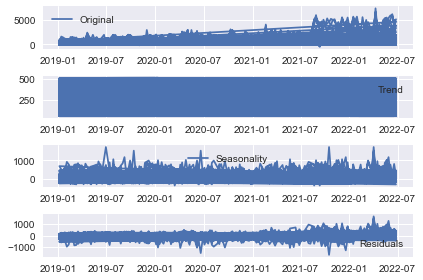

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decomposition = seasonal_decompose(data_train, period = round(len(df)/3) ) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [149]:
#add in the SARIMA
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [150]:
#finding the optimal parameters (best performance) for the model

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except Exception as E: 
            print(E)
            continue
            
            #took 30 minutes to run
            
    # the smallest AIC (Akaike’s Information Criterion)  
    # SARIMA(1, 0, 1)x(1, 1, 1, 12)12 -	AIC:	1313674.075


SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1486245.1873686376
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1434491.1190359336
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1388985.9304730818
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1352395.2651817226
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1379116.3264947312
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1352508.878168719
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1366664.9377985885
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1345927.3492999794
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1430804.2191770955
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1404982.746579228
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1386074.436123998
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1340947.277109474
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1373285.8744766894
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1407832.7311662906
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1362059.7597594315
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1337411.0979676184
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1367270.489364356
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AI

In [151]:
# SARIMA(1, 0, 1)x(1, 1, 1, 12)12 -	AIC:	1313674.075
# train the model using the training data

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod= SARIMAX(data_train,order=(1,0,1),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False, enforce_stationarity=False)
results = mod.fit(disp=0)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          UnitsSold   No. Observations:               100065
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood             -656832.037
Date:                            Mon, 25 Jul 2022   AIC                        1313674.075
Time:                                    20:35:55   BIC                        1313721.641
Sample:                                         0   HQIC                       1313688.510
                                         - 100065                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9683      0.000   4434.741      0.000       0.968       0.969
ma.L1         -0.7814      0.001  -

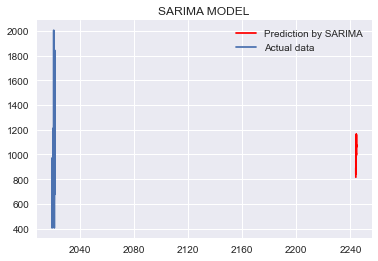

In [153]:
pred_sarima = results.forecast(120)
predicted =plt.plot(pred_sarima,label='Prediction by SARIMA', color='red')
Actual = plt.plot(data_for_dist_fitting,label='Actual data')
plt.legend(loc='best') 
plt.title('SARIMA MODEL')
plt.show(block=False)

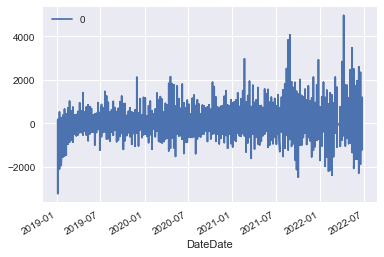

In [154]:
# plot residual errors of the training data
residual_error = pd.DataFrame(results.resid)
residual_error.plot()
plt.show()

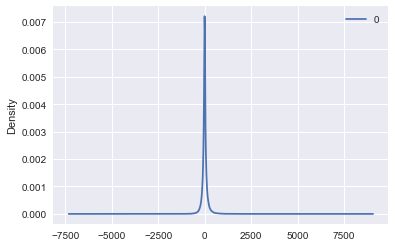

                   0
count  100065.000000
mean        3.493324
std       171.787513
min     -3222.630475
25%       -46.974972
50%        -3.404093
75%        38.829939
max      4962.198027


In [155]:
#plot the residual errors

residual_error.plot(kind='kde')
plt.show()
print(residual_error.describe())

In [208]:
# there is bias. the mean is far from zero. it is 3.493324

#let's reduce the errors and do a rolling forecast

#to suppress warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

#creating new dataframe for rolling forescast

predictions = list()

In [209]:
history.dropna(inplace=True)
data_for_dist_fitting.dropna(inplace=True)

In [211]:
for i in range(len(data_for_dist_fitting)): 
    model = SARIMAX(history,order=(1,0,1),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False, enforce_stationarity=True)


In [217]:
model

In [214]:

    model_fit = model.fit(disp = 0)
    #output = model_fit.forecast() 
    #print(model())


LinAlgError: Array must not contain infs or NaNs

In [178]:

    
    # generate forcecast for next period
    output = model_fit.forecast()
    #Save the prediction value in yhat
    yhat = np.e ** output[0]
    #Append yhat to the list of prediction
    predictions.append(yhat)
    # grabs the observation at the ith index
    obs = data_for_dist_fitting[i : i + 1]
    # appends the observation to the estimation data set
    history = history.append(np.log(obs.astype(float)))

NameError: name 'model_fit' is not defined

In [172]:



    
# prints the MSE of the model for the rolling forecast period
error = mean_squared_error(data_for_dist_fitting, predictions)
error.dropna(inplace=True)
print('Test MSE: %.3f' % error)
# converts the predictions list to a pandas dataframe with the same index as the actual values
# for plotting purposes
predictions = pd.DataFrame(predictions)
predictions.dropna(inplace=True)
predictions.index = data_for_dist_fitting.index
predictions.index.dropna(inpace=True)
# sets the plot size to 12x8
mlp.rcParams['figure.figsize'] = (12,8)
mlp.rcParams.dropna(inplace=True)
# plots the predicted and actual stock prices 
plt.plot(data_for_dist_fitting,label='Actual values')

plt.plot(predictions, color = 'red', label='predicted rolling forecast')
plt.plot.dropna(inplace=True)
plt.legend(loc='best')
plt.xlabel('week')
plt.ylabel('#passengers')
plt.title('Predicted vs. Actual #of passengers')
plt.show()

LinAlgError: SVD did not converge